In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
file_handler = open("car_data.csv", "r")
car_data = pd.read_csv('car_data.csv')
file_handler.close()

In [3]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
buying = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
car_data.buying = [buying[item] for item in car_data.buying]
maint = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
car_data.maint = [maint[item] for item in car_data.maint]
doors = {'2': 2, '3': 3, '4': 4, '5more': 5}
car_data.doors = [doors[item] for item in car_data.doors]
persons = {'2': 2, '4': 4, 'more': 6}
car_data.persons = [persons[item] for item in car_data.persons]
lug_boot = {'big': 2, 'med': 1, 'small': 0}
car_data.lug_boot = [lug_boot[item] for item in car_data.lug_boot]
safety = {'high': 2, 'med': 1, 'low': 0}
car_data.safety = [safety[item] for item in car_data.safety]
acceptability = {'vgood': 1, 'good': 1, 'acc': 1, 'unacc': 0}
car_data.acceptability = [acceptability[item] for item in car_data.acceptability]
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [5]:
x = car_data.values[:,[0,1,2,3,4,5]]
y = car_data.values[:,6]

In [6]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = np.random)

# Standardizing the features 
sc_X = StandardScaler()
sc_X.fit(x_train)
x_train = sc_X.transform(x_train)
x_test = sc_X.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(x_test) 
y_pred[0:30] 

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[214,  20],
       [ 31,  81]], dtype=int64)

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='positive', average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.8526011560693642
Precision: 0.8503283783610166
Recall: 0.8526011560693642


Text(0.5, 257.44, 'Predicted label')

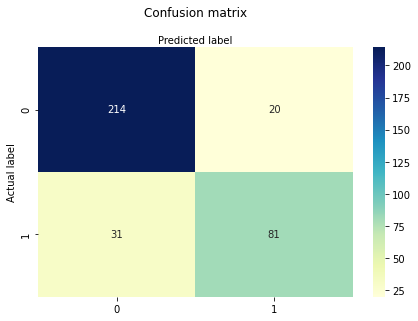

In [11]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [12]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
metrics = ['accuracy', 'precision', 'recall']
sum = 0
for kfoldloop in (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20): 
    cv = KFold(n_splits=kfoldloop, random_state=1, shuffle=True)
    scores = cross_validate(lr, x_train, y_train, scoring=metrics, cv=cv, n_jobs=-1)
    sorted(scores.keys())
    ['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']
    print("K = ", kfoldloop)
    print("Accuracy:", np.mean(scores['test_accuracy']))
    print("Precision:", np.mean(scores['test_precision']))
    print("Recall:", np.mean(scores['test_recall']))

K =  2
Accuracy: 0.8654124457308249
Precision: 0.7853302292065076
Recall: 0.7383960047003526
K =  3
Accuracy: 0.8675893615014618
Precision: 0.795201605546433
Recall: 0.7369151825892267
K =  4
Accuracy: 0.8668530619083522
Precision: 0.7939483749237689
Recall: 0.732819776410984
K =  5
Accuracy: 0.8682885993826192
Precision: 0.7996396396396396
Recall: 0.7365593158175299
K =  6
Accuracy: 0.8675512892904198
Precision: 0.7989898567717889
Recall: 0.7329737224801668
K =  7
Accuracy: 0.8646655093355601
Precision: 0.7933329486176726
Recall: 0.7276699902876026
K =  8
Accuracy: 0.8697531590267509
Precision: 0.7981994702169629
Recall: 0.7372997598162072
K =  9
Accuracy: 0.8697290363957031
Precision: 0.8031977747942077
Recall: 0.7368773334550132
K =  10
Accuracy: 0.8690021895527057
Precision: 0.8063315239785828
Recall: 0.7307122170614979
K =  11
Accuracy: 0.8697720057720058
Precision: 0.8066027128648163
Recall: 0.737105760130966
K =  12
Accuracy: 0.8733570714642679
Precision: 0.8083306226944242
Reca

In [14]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
metrics = ['accuracy', 'precision', 'recall']
sum = 0
for kfoldloop in (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20): 
    cv = KFold(n_splits=kfoldloop, random_state=1, shuffle=True)
    scores = cross_validate(gb, x_train, y_train, scoring=metrics, cv=cv, n_jobs=-1)
    sorted(scores.keys())
    ['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']
    print("K = ", kfoldloop)
    print("Accuracy:", np.mean(scores['test_accuracy']))
    print("Precision:", np.mean(scores['test_precision']))
    print("Recall:", np.mean(scores['test_recall']))

K =  2
Accuracy: 0.8806078147612156
Precision: 0.868367968333714
Recall: 0.6959949079514297
K =  3
Accuracy: 0.890020120091798
Precision: 0.8877208827456217
Recall: 0.7146828877211172
K =  4
Accuracy: 0.8907388791153557
Precision: 0.8859986825946349
Recall: 0.7165263107812351
K =  5
Accuracy: 0.8878381206508659
Precision: 0.8844734994734994
Recall: 0.7067422363574678
K =  6
Accuracy: 0.8900056465273857
Precision: 0.8866097142591708
Recall: 0.7141182918213894
K =  7
Accuracy: 0.8892844324316405
Precision: 0.886588570277605
Recall: 0.7131170614569998
K =  8
Accuracy: 0.889295436214545
Precision: 0.8870698413412417
Recall: 0.7097937552213869
K =  9
Accuracy: 0.8892850069320658
Precision: 0.8847554074742565
Recall: 0.7196484076523648
K =  10
Accuracy: 0.8885778333854656
Precision: 0.8893675692499221
Recall: 0.7092556565383881
K =  11
Accuracy: 0.8892987012987014
Precision: 0.8881661186646524
Recall: 0.7141742988274116
K =  12
Accuracy: 0.8914792603698151
Precision: 0.8902029582258218
Recal

In [15]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(x_train, y_train) 
y_nbpred  =  classifier.predict(x_test) 
y_nbpred[0:30]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_nbpred))
print("Precision:",metrics.precision_score(y_test, y_nbpred, pos_label='positive', average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_nbpred, pos_label='positive', average='weighted'))

Accuracy: 0.8757225433526011
Precision: 0.8767891263874993
Recall: 0.8757225433526011


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cnf_matrix2 = confusion_matrix(y_test, y_nbpred)
cnf_matrix2

array([[224,  10],
       [ 33,  79]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

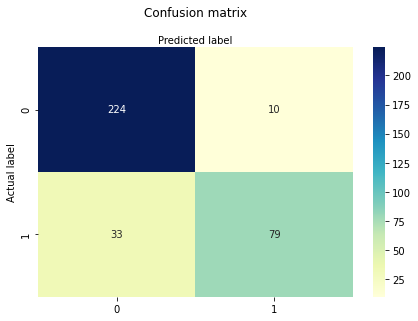

In [18]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(x_train)
xpca = pca.transform(x_train)

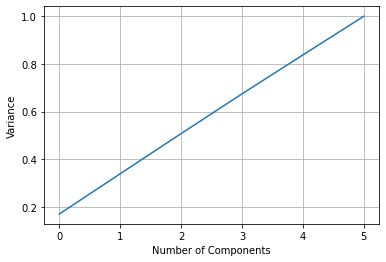

In [20]:
plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.grid()

Accuracy: 0.6994219653179191
Precision: 0.6928561342095826
Recall: 0.6994219653179191


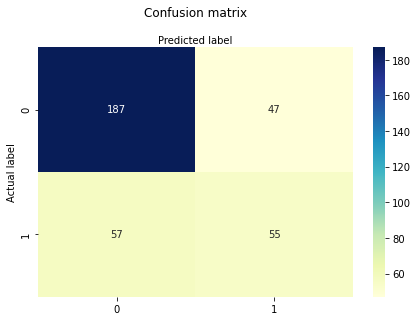

In [21]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(xpca, y_train) 
y_pred_pca = classifier.predict(x_test)
y_pred_pca[0:30] 
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
from sklearn.metrics import confusion_matrix 
cnf_matrix_pca = confusion_matrix(y_test, y_pred_pca) 
cnf_matrix_pca 
sns.heatmap(pd.DataFrame(cnf_matrix_pca), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pca))
print("Precision:",metrics.precision_score(y_test, y_pred_pca, pos_label='positive', average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred_pca, pos_label='positive', average='weighted'))

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=1)
lda_t = lda.fit_transform(x_train,y_train)
y_pred_lda = lda.predict(x_test) 
y_pred_lda[0:30]

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [23]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lda))
print("Precision:",metrics.precision_score(y_test, y_pred_lda, pos_label='positive', average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred_lda, pos_label='positive', average='weighted'))

Accuracy: 0.8439306358381503
Precision: 0.8414873198402832
Recall: 0.8439306358381503


Text(0.5, 257.44, 'Predicted label')

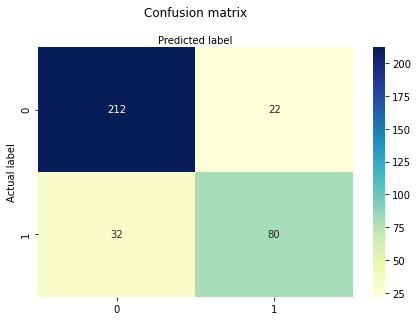

In [24]:
cnf_matrix3 = confusion_matrix(y_test, y_pred_lda)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
x1 = car_data.values[:, 0]
x2 = car_data.values[:, 1]  
x3 = car_data.values[:, 2]
x4 = car_data.values[:, 3]
x5 = car_data.values[:, 4] 
x6 = car_data.values[:, 5] 
y  = car_data.values[:, 6] 

In [26]:
def mean_squared_error (y, y_bar): 
    difference = y - y_bar 
    squared_difference = difference**2 
    summation = squared_difference.sum()   
    MSE = summation/len(y) 
    return MSE 

In [27]:
def gradient_decsent(x, y, lr, i_iter): 
    theta0 = 0 
    theta1 = 0 
    losses = [] 
    thetas = [] 
    for i in range (i_iter): 
        y_bar = theta1*x + theta0 
        loss = mean_squared_error(y, y_bar) 
        theta0 = theta0 - (lr*-2*(y-y_bar).sum()/len(y)) 
        theta1 = theta1 - (lr*-2*(x.dot(y-y_bar)).sum()/len(y)) 
        losses.append(loss) 
        thetas.append((theta0, theta1)) 
    return thetas, losses 

In [28]:
thetas1, losses1 = gradient_decsent(x1, y, 0.1, 100) 
thetas2, losses2 = gradient_decsent(x2, y, 0.1, 100) 
thetas3, losses3 = gradient_decsent(x3, y, 0.1, 100) 
thetas4, losses4 = gradient_decsent(x4, y, 0.1, 100) 
thetas5, losses5 = gradient_decsent(x5, y, 0.1, 100) 
thetas6, losses6 = gradient_decsent(x6, y, 0.1, 100) 

In [29]:
print("y_bar=",thetas1[99][1],"x1 +",thetas1[99][0]) 
print("y_bar=",thetas2[99][1],"x2 +",thetas2[99][0]) 
print("y_bar=",thetas3[99][1],"x3 +",thetas3[99][0]) 
print("y_bar=",thetas4[99][1],"x4 +",thetas4[99][0]) 
print("y_bar=",thetas5[99][1],"x5 +",thetas5[99][0]) 
print("y_bar=",thetas6[99][1],"x6 +",thetas6[99][0]) 

y_bar= -0.08340895323185711 x1 + 0.4246359694020135
y_bar= -0.07416488533971391 x2 + 0.4107795147140705
y_bar= -2.2587848519177108e+26 x3 + -5.89397245690261e+25
y_bar= -1.6291205036951662e+45 x4 + -3.516696109088365e+44
y_bar= 0.07144905610395608 x5 + 0.22821543835151284
y_bar= 0.2593262001798127 x6 + 0.04052848609098093


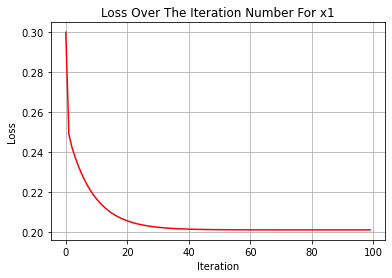

In [30]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number For x1') 
plt.plot(x_axis,losses1,color='red') 

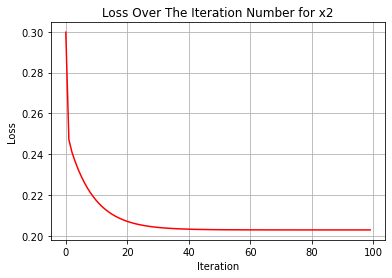

In [31]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x2') 
plt.plot(x_axis,losses2,color='red') 

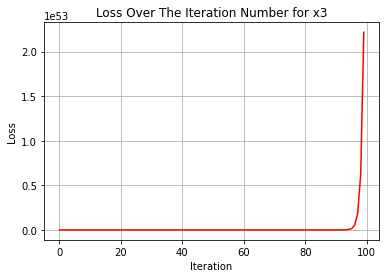

In [32]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x3') 
plt.plot(x_axis,losses3,color='red') 

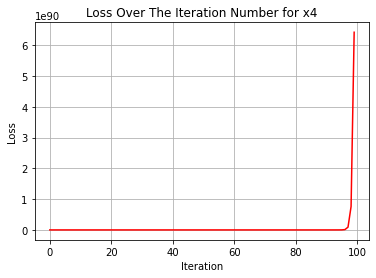

In [33]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x4') 
plt.plot(x_axis,losses4,color='red') 

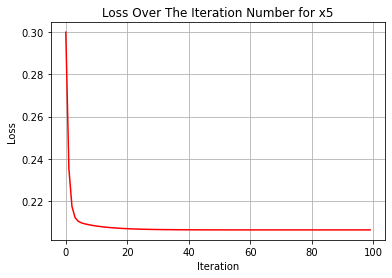

In [34]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x5') 
plt.plot(x_axis,losses5,color='red') 

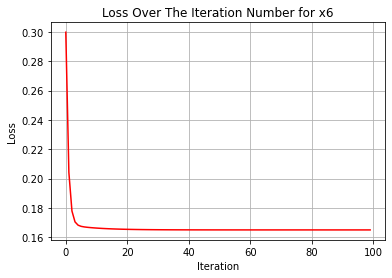

In [35]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x6') 
plt.plot(x_axis,losses6,color='red') 

In [36]:
print("final loss for the first column:", losses1[99]) 
print("final loss for the second column:", losses2[99]) 
print("final loss for the third column:", losses3[99]) 
print("final loss for the fourth column:", losses4[99]) 
print("final loss for the fifth column:", losses5[99]) 
print("final loss for the sixth column:", losses6[99]) 

final loss for the first column: 0.20113036015205932
final loss for the second column: 0.20296290031600558
final loss for the third column: 2.216040706950132e+53
final loss for the fourth column: 6.423806551336502e+90
final loss for the fifth column: 0.20652963888568068
final loss for the sixth column: 0.16499707812768777


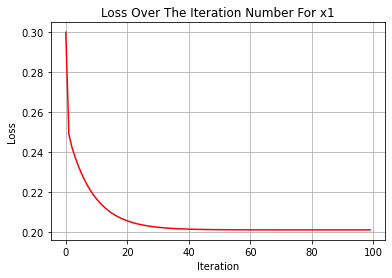

In [37]:
thetas2, losses2 = gradient_decsent(x2, y, 0.01, 100) 
thetas3, losses3 = gradient_decsent(x3, y, 0.01, 100) 
thetas4, losses4 = gradient_decsent(x4, y, 0.01, 100) 
thetas5, losses5 = gradient_decsent(x5, y, 0.01, 100) 
thetas6, losses6 = gradient_decsent(x6, y, 0.01, 100) 

x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number For x1') 
plt.plot(x_axis,losses1,color='red') 

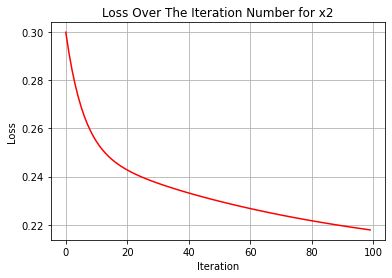

In [38]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x2') 
plt.plot(x_axis,losses2,color='red') 

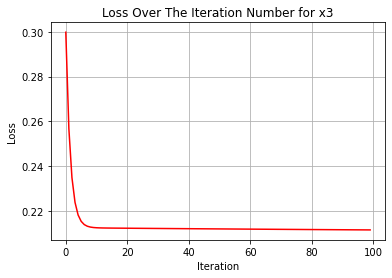

In [39]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x3') 
plt.plot(x_axis,losses3,color='red')

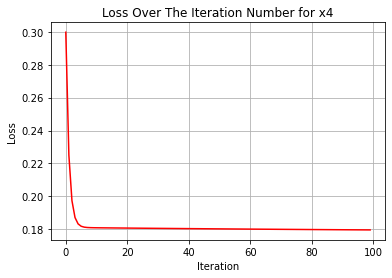

In [40]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x4') 
plt.plot(x_axis,losses4,color='red') 

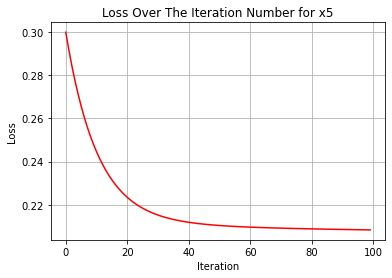

In [41]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x5') 
plt.plot(x_axis,losses5,color='red') 

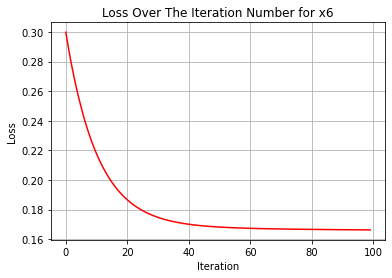

In [42]:
x_axis = np.arange(0., 100, 1) 
plt.grid() 
plt.xlabel('Iteration') 
plt.ylabel('Loss') 
plt.title('Loss Over The Iteration Number for x6') 
plt.plot(x_axis,losses6,color='red') 

In [43]:
print("final loss for the first column:", losses1[99]) 
print("final loss for the second column:", losses2[99]) 
print("final loss for the third column:", losses3[99]) 
print("final loss for the fourth column:", losses4[99]) 
print("final loss for the fifth column:", losses5[99]) 
print("final loss for the sixth column:", losses6[99]) 

final loss for the first column: 0.20113036015205932
final loss for the second column: 0.2178840718943801
final loss for the third column: 0.21149317775625842
final loss for the fourth column: 0.17956480646029002
final loss for the fifth column: 0.20844060449792876
final loss for the sixth column: 0.16631268945694924
